# Problem 1

In [1]:
import numpy as np
from numpy.random import default_rng
import torch
import pandas as pd
import seaborn as sns

## 1 Perceptron Algorithm

In [2]:
def get_dataset(n):
    rng = default_rng()
    x_1 = rng.random(n)
    x_2 = rng.random(n)
    y = (x_1 > x_2).astype(np.int32)
    X = np.stack([x_1, x_2], axis=1)
    return X, y

In [3]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [4]:
def perceptron_train(X, y, lr, epochs, bias=1.0, margin=0.0):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    # if a != 0:
    theta = np.zeros((n+1,1))
    # else:
        # theta = np.zeros((n,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, bias).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))

            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [5]:
def perceptron_test(X, y, theta, bias=1.0):
    # X --> Inputs.
    # y --> labels/target.
    # theta --> trained parameters.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    wrong_list = []

    for idx in range(len(X)):
        x_i = X[idx]
        x_i = np.insert(x_i, 0, bias).reshape(-1,1)
            
        # Calculating prediction/hypothesis.
        y_hat = step_func(np.dot(x_i.T, theta))
        if y_hat != y[idx]:
            wrong_list.append(idx)
    return 1 - len(wrong_list)/m

Train Accuracy, bias=0, 1.0
Test Accuracy, bias=0, 0.9712


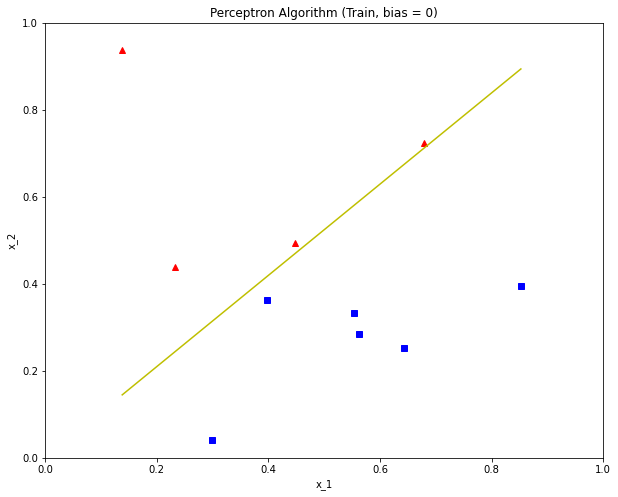

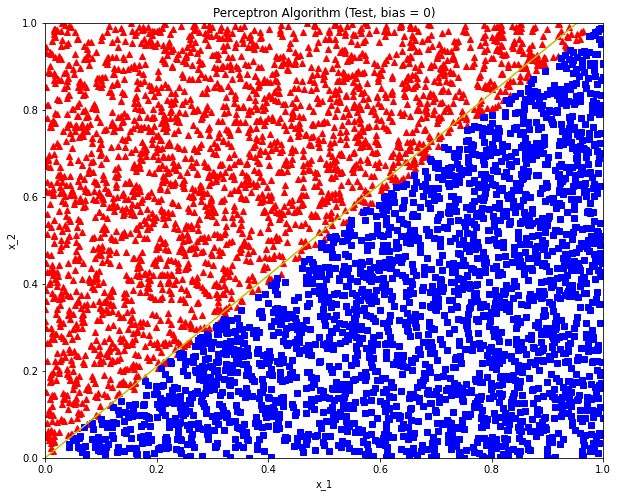

In [6]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, theta, title=""):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    # c = -theta[0]/theta[2]
    c = 0
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.title('Perceptron Algorithm' + title)
    plt.plot(x1, x2, 'y-')

train_X, train_y = get_dataset(10)
test_X, test_y = get_dataset(5000)

theta, _ = perceptron_train(train_X, train_y, 0.05, 100, bias=0, margin=0.0)
# print(theta)
plot_decision_boundary(train_X, train_y, theta, title=" (Train, bias = 0)")
plot_decision_boundary(test_X, test_y, theta, title=" (Test, bias = 0)")
print("Train Accuracy, bias=0,", perceptron_test(train_X, train_y, theta))
print("Test Accuracy, bias=0,", perceptron_test(test_X, test_y, theta))

# theta, _ = perceptron_train(train_X, train_y, 0.05, 100, a=1.0)
# plot_decision_boundary(train_X, train_y, theta, title=" (Train, a = 1)")
# plot_decision_boundary(test_X, test_y, theta, title=" (Test, a = 1)")
# print("Train Accuracy, a=1:", perceptron_test(train_X, train_y, theta))
# print("Test Accuracy, a=1:", perceptron_test(test_X, test_y, theta))

## 2 hinge-loss

In [7]:
def perceptron_train_hinge_loss(X, y, lr, epochs, bias=1.0, margin=0.0):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    # if a != 0:
    theta = np.zeros((n+1,1))
    # else:
        # theta = np.zeros((n,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, bias).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))

            # Updating if the example is misclassified.
            if (y_hat) * y[idx] < margin:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

Train Accuracy, bias=0, margin=1 1.0
Test Accuracy, bias=0, margin=1 0.9712


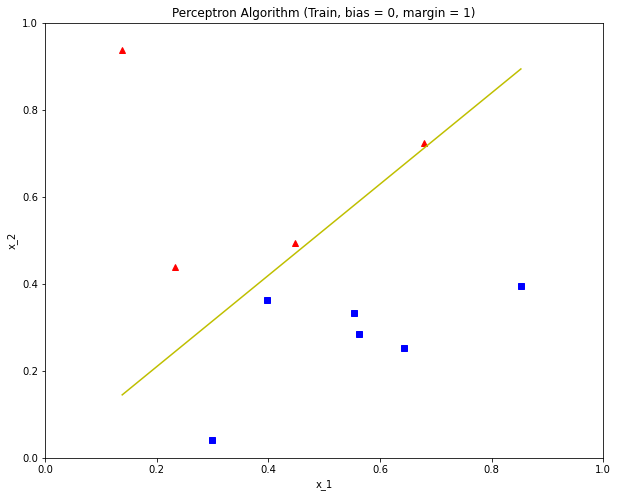

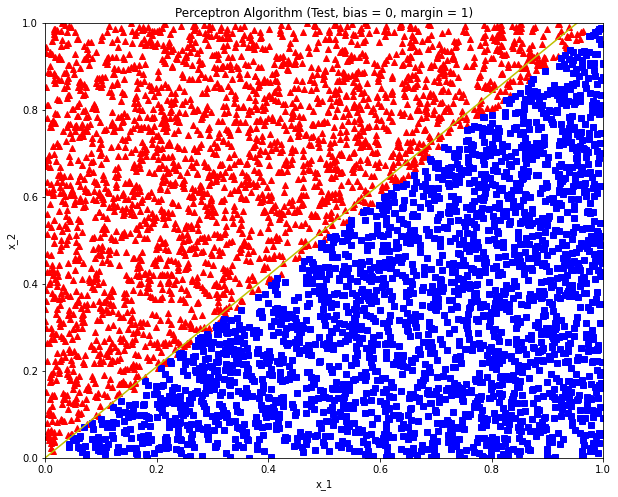

In [8]:
theta, _ = perceptron_train_hinge_loss(train_X, train_y, 0.05, 100, bias=0, margin=1.0)
# print(theta)
plot_decision_boundary(train_X, train_y, theta, title=" (Train, bias = 0, margin = 1)")
plot_decision_boundary(test_X, test_y, theta, title=" (Test, bias = 0, margin = 1)")
print("Train Accuracy, bias=0, margin=1", perceptron_test(train_X, train_y, theta))
print("Test Accuracy, bias=0, margin=1", perceptron_test(test_X, test_y, theta))

## 3
In which case do you obtain better test accuracy and why? (2)

If the y range is not in {-1,1}, then hinge-loss will achieve better accuracy.

## 4
In which case do you think that the classification of the same 5000 test instances will not change significantly by using a different set of 10 training points? (2)

If there are some instances of 10 training samples that are close to the decision boundary, then the classification of the same 5000 test instances will not change significantly.

In other words, that the decision boundary do not change much, the classification of the same 5000 test instances will not change significantly.

# Problem 2 (Weight Initialization, Dead Neurons, Leaky ReLU)

## 1
Standard Normalization, Xavier Initialization, and He Initialization  
tanh, sigmoid, ReLU

In [76]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


2022-02-23 00:48:58.280016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 00:48:58.280336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 00:48:58.280422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 00:48:58.280747: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [77]:
# import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

from tensorflow import keras
from keras import optimizers
import numpy as np
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from matplotlib import pyplot as plt
import pandas as pd



def grid_axes_it(n_plots, n_cols=3, enumerate=False, fig=None):
    """
    Iterate through Axes objects on a grid with n_cols columns and as many
    rows as needed to accommodate n_plots many plots.
    Args:
        n_plots: Number of plots to plot onto figure.
        n_cols: Number of columns to divide the figure into.
        fig: Optional figure reference.
    Yields:
        n_plots many Axes objects on a grid.
    """
    n_rows = int(n_plots / n_cols + int(n_plots % n_cols > 0))

    if not fig:
        default_figsize = rcParamsDefault['figure.figsize']
        fig = plt.figure(figsize=(
            default_figsize[0] * n_cols,
            default_figsize[1] * n_rows
        ))

    for i in range(1, n_plots + 1):
        ax = plt.subplot(n_rows, n_cols, i)
        yield ax


def create_mlp_model(
    n_hidden_layers,
    dim_layer,
    input_shape,
    n_classes,
    kernel_initializer,
    bias_initializer,
    activation,
):
    """Create Multi-Layer Perceptron with given parameters."""
    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    return model


def create_cnn_model(input_shape, num_classes, kernel_initializer='glorot_uniform',
                     bias_initializer='zeros'):
    """Create CNN model similar to
       https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py."""
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape,
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer))
    model.add(Conv2D(64, (3, 3), activation='relu',
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu',
                    kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax',
                    kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    return model


def compile_model(model):
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])
    return model


def get_init_id(init):
    """
    Returns string ID summarizing initialization scheme and its parameters.
    Args:
        init: Instance of some initializer from keras.initializers.
    """
    try:
        init_name = str(init).split('.')[2].split(' ')[0]
    except:
        init_name = str(init).split(' ')[0].replace('.', '_')

    param_list = []
    config = init.get_config()
    for k, v in config.items():
        if k == 'seed':
            continue
        param_list.append('{k}-{v}'.format(k=k, v=v))
    init_params = '__'.join(param_list)

    return '|'.join([init_name, init_params])


def get_activations(model, x, mode=0.0):
    """Extract activations with given model and input vector x."""
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations(x)
    return output_elts


class LossHistory(keras.callbacks.Callback):
    """A custom keras callback for recording losses during network training."""

    def on_train_begin(self, logs={}):
        self.losses = []
        self.epoch_losses = []
        self.epoch_val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs={}):
        self.epoch_losses.append(logs.get('loss'))
        self.epoch_val_losses.append(logs.get('val_loss'))

### Define Dataset

In [78]:
seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

### Standard Normalization

#### Sigmoid 

In [80]:
# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
def std_norm_init_draw(activation='sigmoid'):
    rows = []
    sigmas = [0.10, 0.14, 0.28]
    for stddev in sigmas:
        init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
        activation = 'sigmoid'

        model = create_mlp_model(
            n_hidden_layers,
            dim_layer,
            (data_dim,),
            n_classes,
            init,
            'zeros',
            activation
        )
        compile_model(model)
        output_elts = get_activations(model, x_test)
        n_layers = len(model.layers)
        i_output_layer = n_layers - 1

        for i, out in enumerate(output_elts[:-1]):
            if i > 0 and i != i_output_layer:
                for out_i in out.ravel()[::20]:
                    rows.append([i, stddev, out_i])

    df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])
    # print(df)

    # Plot previously saved activations from the 5 hidden layers
    # using different initialization schemes.
    fig = plt.figure(figsize=(12, 6))
    axes = grid_axes_it(len(sigmas), 1, fig=fig)
    for sig in sigmas:
        ax = next(axes)
        ddf = df[df['Standard Deviation'] == sig]
        sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

        ax.set_xlabel('')
        ax.set_ylabel('')

        ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

        if sig == sigmas[1]:
            ax.set_ylabel(f"{activation} Neuron Outputs")
        if sig != sigmas[-1]:
            ax.set_xticklabels(())
        else:
            ax.set_xlabel("Hidden Layer")

    plt.tight_layout()
    plt.show()

2022-02-23 00:49:23.581144: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


        Hidden Layer  Standard Deviation    Output
0                  1                0.10  0.625847
1                  1                0.10  0.315845
2                  1                0.10  0.091265
3                  1                0.10  0.546288
4                  1                0.10  0.282601
...              ...                 ...       ...
749995             5                0.28  0.579788
749996             5                0.28  0.489162
749997             5                0.28  0.260744
749998             5                0.28  0.318868
749999             5                0.28  0.855186

[750000 rows x 3 columns]


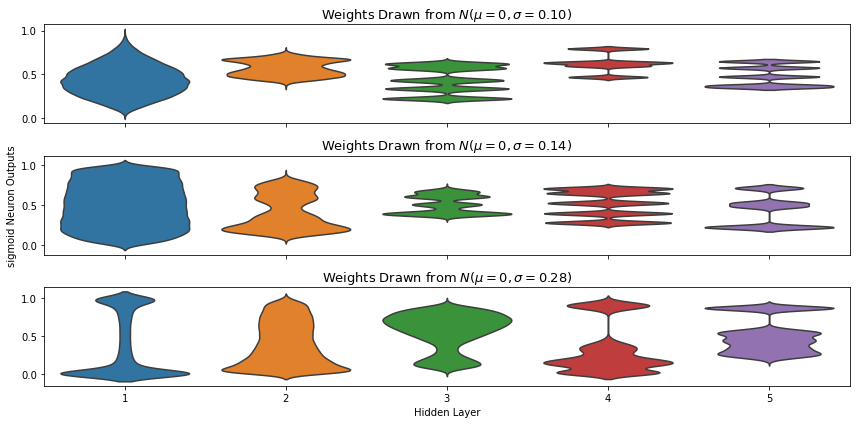

In [81]:
std_norm_init_draw(activation='sigmoid')

#### Tanh

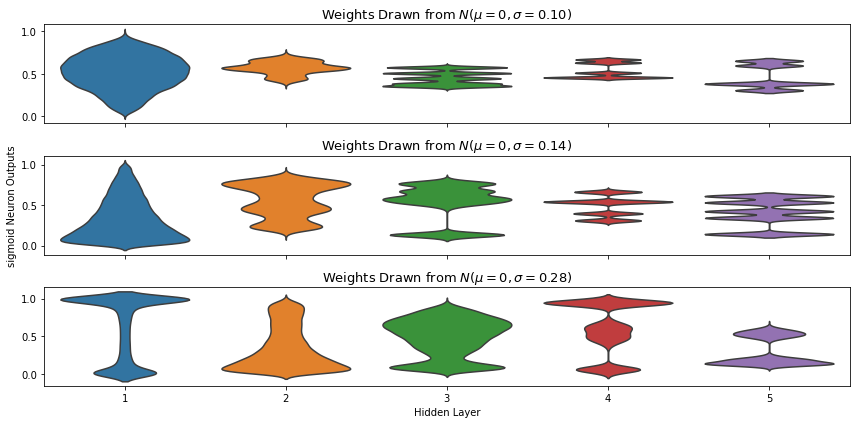

In [35]:
std_norm_init_draw(activation="tanh")

#### ReLU

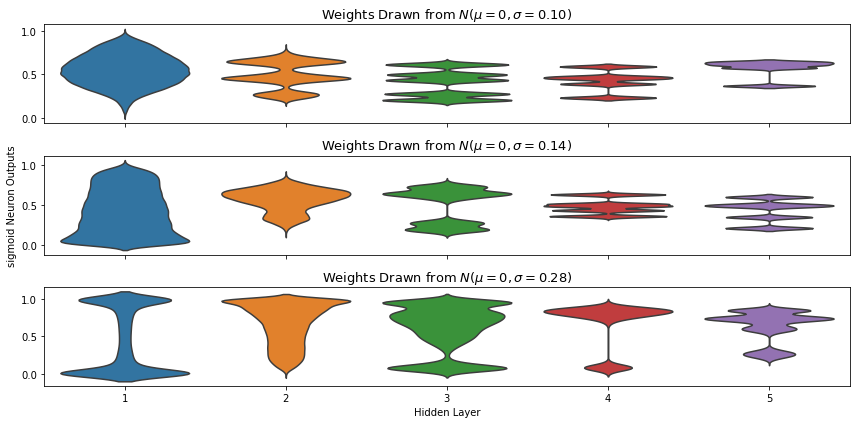

In [36]:
std_norm_init_draw(activation="relu")

### Xavier Initialization

In [73]:
# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
def xavier_init_draw(activation='sigmoid'):
    rows = []
    # sigmas = [0.10, 0.14, 0.28]
    # for stddev in sigmas:
        # init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    init = initializers.glorot_normalV2()
    # activation = 'sigmoid'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model, x_test)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

    df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

    # Plot previously saved activations from the 5 hidden layers
    # using different initialization schemes.
    fig = plt.figure(figsize=(12, 6))
    axes = grid_axes_it(1, 1, fig=fig)
    # for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from Xavier (Glorot normal)', fontsize=13)

    ax.set_ylabel(f"{activation} Neuron Outputs")
    ax.set_xlabel("Hidden Layer")

    plt.tight_layout()
    plt.show()

#### Sigmoid

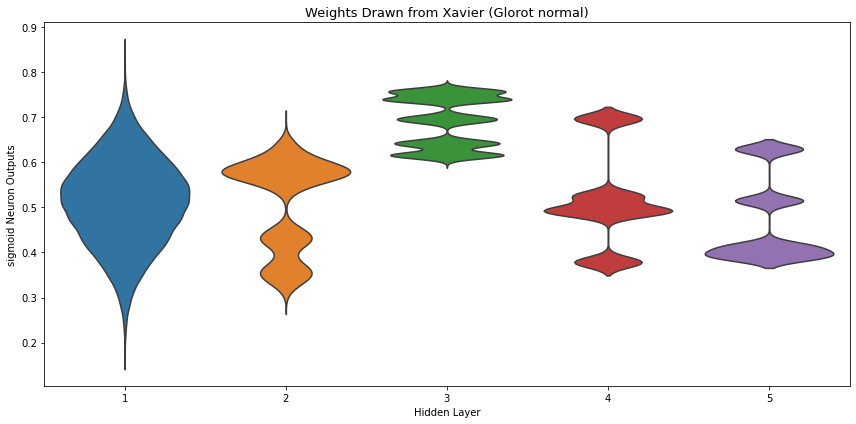

In [55]:
xavier_init_draw(activation="sigmoid")

#### Tanh

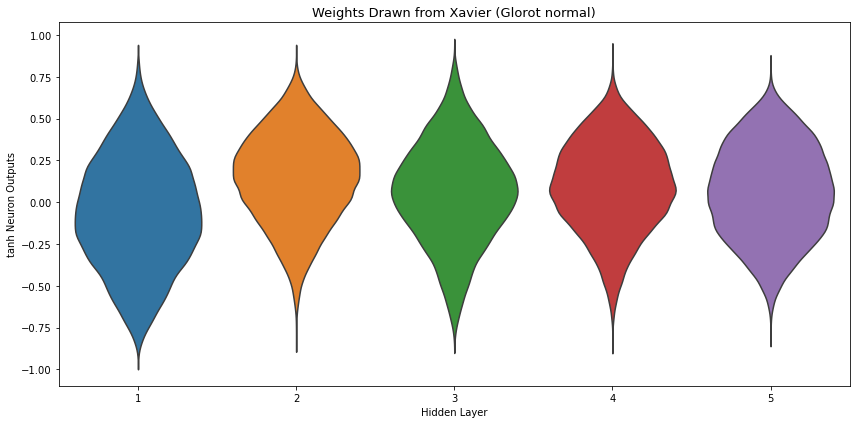

In [56]:
xavier_init_draw(activation="tanh")

#### ReLU

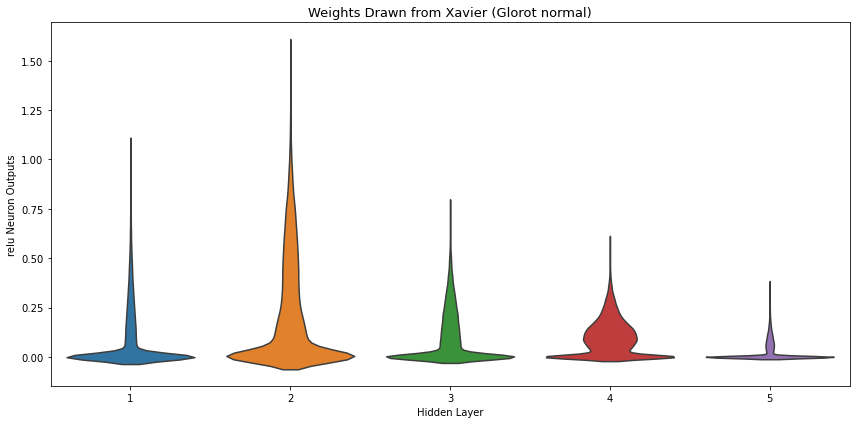

In [57]:
xavier_init_draw(activation="relu")

### He Initialization

In [58]:
# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
def he_init_draw(activation='sigmoid'):
    rows = []
    init = initializers.he_normalV2()

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model, x_test)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

    df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

    # Plot previously saved activations from the 5 hidden layers
    # using different initialization schemes.
    fig = plt.figure(figsize=(12, 6))
    axes = grid_axes_it(1, 1, fig=fig)
    # for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from Xavier (Glorot normal)', fontsize=13)

    ax.set_ylabel(f"{activation} Neuron Outputs")
    ax.set_xlabel("Hidden Layer")

    plt.tight_layout()
    plt.show()

#### Sigmoid

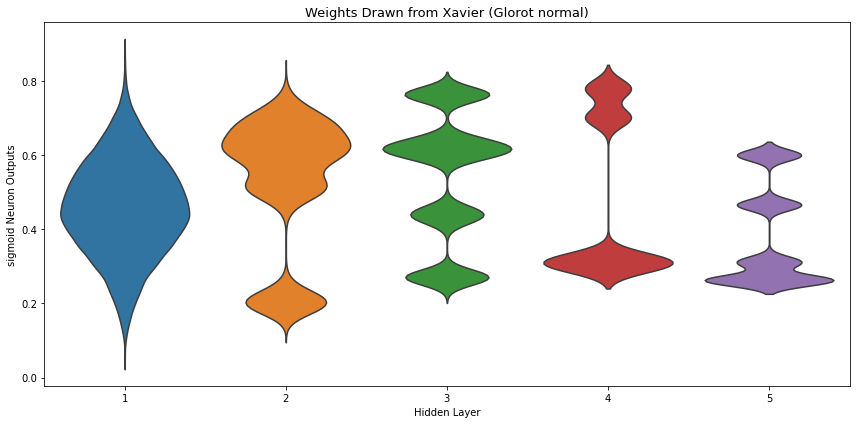

In [59]:
he_init_draw(activation="sigmoid")

#### Tanh

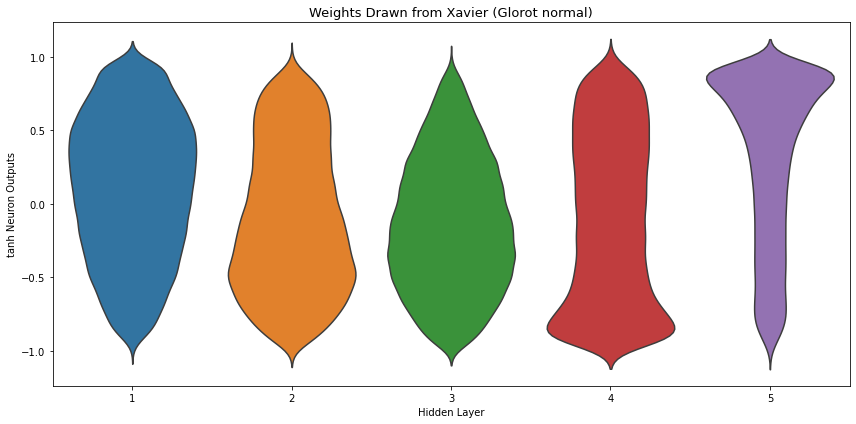

In [60]:
he_init_draw(activation="tanh")

#### ReLU

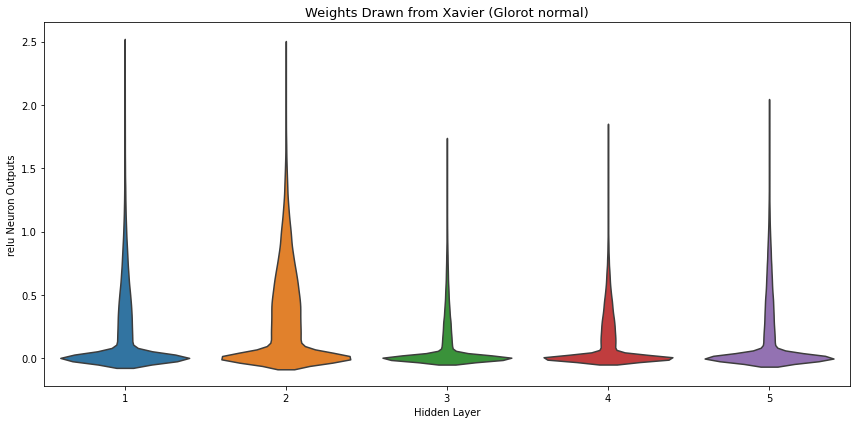

In [61]:
he_init_draw(activation="relu")

### Summary

Xavier initialization (also called Glorot initialization) was developed with aim to solve gradient vanishing problem, but for relu activation function, it is not necessary. Compaering the performance of Xavier initialization and He initialization for ReLU, He initialization is better, becuase the input and output is within the same range and scale.

## 2
The dying ReLU is a kind of vanishing gradient, which refers to a problem when ReLU neurons become inactive and only output 0 for any input. In the worst case of dying ReLU, ReLU neurons at a certain layer are all dead, i.e., the entire network dies and is referred as the dying ReLU neural networks in Lu et al (reference below). A dying ReLU neural network collapses to a constant function. Show this phenomenon using any one of the three 1-dimensional functions in page 13 of Lu et al. Use a 10-layer ReLU network with width 2 (hidden units per layer). Use minibatch of 64 and draw training data uniformly from [− √ 7, √ 7]. Perform 1000 independent training simulations each with 3,000 training points. Out of these 1000 simulations, what fraction resulted in neural network collapse. Is your answer close to over 90% as was reported in Lu et al. ? (10)

\begin{equation}
f_{1}(x)=|x|
\end{equation}

### Function Definition

In [7]:
import numpy as np
# We use the function above
def one_dimentsion_function(x):
    return np.abs(x)

In [8]:
one_dimentsion_function(1)

1

In [9]:
x = np.array([1, 2, 3, 4, 5])
one_dimentsion_function(x)

array([1, 2, 3, 4, 5])

### Dataset Genration

In [16]:
import math


In [98]:
from torch.utils.data import Dataset, DataLoader

class ToyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.Tensor(X).float()
        self.Y = torch.Tensor(Y).float()
    def __getitem__(self, index):
        return self.X[index], self.Y[index]
    def __len__(self):
        return len(self.X)

train_X = np.random.uniform(low=-math.sqrt(7), high=math.sqrt(7), size=(3000, 1))
train_Y = one_dimentsion_function(train_X)
train_dataset = ToyDataset(train_X, train_Y)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

### 10 Layer ReLU

In [178]:
# Define ten layer ReLU Network
import torch
import torch.nn as nn

def RAI(fan_in, fan_out):
    """Randomized asymmetric initializer.
    It draws samples using RAI where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.
    """
    V = np.random.randn(fan_out, fan_in + 1) * 0.6007 / fan_in ** 0.5
    for j in range(fan_out):
        k = np.random.randint(0, high=fan_in + 1)
        V[j, k] = np.random.beta(2, 1)
    W = V[:, :-1].T
    b = V[:, -1]
    return W.astype(np.float32), b.astype(np.float32)

class ReLULayer(nn.Module):
    def __init__(self, in_dim, out_dim, using_leaky_relu=False, using_RAI=False, with_relu=True, relu_slope=0.01):
        super(ReLULayer, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.linear = nn.Linear(self.in_dim, self.out_dim)
        if with_relu:
            if using_leaky_relu:
                self.relu = nn.LeakyReLU(relu_slope)
            else:
                self.relu = nn.ReLU()
        else:
            self.relu = None
        if using_RAI:
            self.init_weight()
    def forward(self, x):
        out = self.linear(x)
        if self.relu:
            out = self.relu(out)
        return out

    def init_weight(self):
        if self.in_dim == self.out_dim:
            W, b = RAI(self.in_dim, self.out_dim)
            self.linear.weight.data = torch.Tensor(W)
            self.linear.bias.data = torch.Tensor(b)


        

class TenReLU(nn.Module):
    def __init__(self, width=2, using_leaky_relu=False, using_RAI=False, relu_slope=0.01):
        super(TenReLU, self).__init__()
        self.width = width
        self.height = 10
        self.net = []
        self.net.append(ReLULayer(1, width, using_leaky_relu, using_RAI, with_relu=True, relu_slope=relu_slope))
        for i in range(self.height-2):
            self.net.append(ReLULayer(in_dim=width, out_dim=width, using_leaky_relu=using_leaky_relu, using_RAI=using_RAI, with_relu=True, relu_slope=relu_slope))
        self.net.append(ReLULayer(in_dim=width, out_dim=1, using_leaky_relu=using_leaky_relu, using_RAI=using_RAI, with_relu=False, relu_slope=relu_slope))
        self.net = nn.Sequential(*self.net)
    
    def forward(self, x):
        z = x
        for i in range(self.height):
            z = self.net[i](z)
        return z

In [179]:
model = TenReLU(using_leaky_relu=False, using_RAI=False)

### Training

In [194]:
from collections import Counter

measure = nn.MSELoss()

collapse_count = 0

for test in range(1000):
    model = TenReLU().cuda()
    final_result_list = []
    optimizer = torch.optim.Adam(model.parameters())
    train_X = np.random.uniform(low=-math.sqrt(7), high=math.sqrt(7), size=(3000, 1))
    train_Y = one_dimentsion_function(train_X)
    train_dataset = ToyDataset(train_X, train_Y)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    for i, (x, y) in enumerate(train_dataloader):
        x = x.cuda()
        y = y.cuda()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = measure(y_pred, y)
        loss.backward()
        optimizer.step()

        # print(y_pred)
        final_result_list.extend(y_pred.squeeze().detach().cpu().numpy().tolist())
    round_result = [round(x) for x in final_result_list]
    freq = Counter(round_result).most_common(1)[0][1]
    if freq > len(train_X) * 0.95:
        collapse_count += 1
    print(f"training progress: {test+1}/1000: {freq}/{len(train_X)}", f"collapse rate:{collapse_count}/{test+1}")

training progress: 1/1000: 3000/3000 collapse rate:1/1
training progress: 2/1000: 3000/3000 collapse rate:2/2
training progress: 3/1000: 3000/3000 collapse rate:3/3
training progress: 4/1000: 3000/3000 collapse rate:4/4
training progress: 5/1000: 3000/3000 collapse rate:5/5
training progress: 6/1000: 3000/3000 collapse rate:6/6
training progress: 7/1000: 3000/3000 collapse rate:7/7
training progress: 8/1000: 3000/3000 collapse rate:8/8
training progress: 9/1000: 3000/3000 collapse rate:9/9
training progress: 10/1000: 3000/3000 collapse rate:10/10
training progress: 11/1000: 3000/3000 collapse rate:11/11
training progress: 12/1000: 3000/3000 collapse rate:12/12
training progress: 13/1000: 2681/3000 collapse rate:12/13
training progress: 14/1000: 3000/3000 collapse rate:13/14
training progress: 15/1000: 3000/3000 collapse rate:14/15
training progress: 16/1000: 3000/3000 collapse rate:15/16
training progress: 17/1000: 3000/3000 collapse rate:16/17
training progress: 18/1000: 3000/3000 col

In [195]:
collapse_rate = collapse_count / (test+1)

In [196]:
collapse_rate

0.909

My test result is close to 90%, which is the result reported in Lu et al.

## 3
Run the 1000 training simulations in part 2 with Leaky ReLU activation and keeping everything else same. Again calculate the fraction of simulations that resulted in neural network collapse. Did Leaky ReLU help in preventing dying neurons ?

In [197]:
from collections import Counter

measure = nn.MSELoss()

collapse_count = 0

for test in range(1000):
    # set leaky relu here
    model = TenReLU(using_leaky_relu=True).cuda()
    final_result_list = []
    optimizer = torch.optim.Adam(model.parameters())
    train_X = np.random.uniform(low=-math.sqrt(7), high=math.sqrt(7), size=(3000, 1))
    train_Y = one_dimentsion_function(train_X)
    train_dataset = ToyDataset(train_X, train_Y)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    for i, (x, y) in enumerate(train_dataloader):
        x = x.cuda()
        y = y.cuda()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = measure(y_pred, y)
        loss.backward()
        optimizer.step()

        # print(y_pred)
        final_result_list.extend(y_pred.squeeze().detach().cpu().numpy().tolist())
    round_result = [round(x) for x in final_result_list]
    freq = Counter(round_result).most_common(1)[0][1]
    if freq > len(train_X) * 0.95:
        collapse_count += 1
    print(f"training progress: {test+1}/1000: {freq}/{len(train_X)}", f"collapse rate:{collapse_count}/{test+1}")

training progress: 1/1000: 3000/3000 collapse rate:1/1
training progress: 2/1000: 3000/3000 collapse rate:2/2
training progress: 3/1000: 3000/3000 collapse rate:3/3
training progress: 4/1000: 2488/3000 collapse rate:3/4
training progress: 5/1000: 3000/3000 collapse rate:4/5
training progress: 6/1000: 3000/3000 collapse rate:5/6
training progress: 7/1000: 3000/3000 collapse rate:6/7
training progress: 8/1000: 3000/3000 collapse rate:7/8
training progress: 9/1000: 3000/3000 collapse rate:8/9
training progress: 10/1000: 3000/3000 collapse rate:9/10
training progress: 11/1000: 3000/3000 collapse rate:10/11
training progress: 12/1000: 3000/3000 collapse rate:11/12
training progress: 13/1000: 3000/3000 collapse rate:12/13
training progress: 14/1000: 3000/3000 collapse rate:13/14
training progress: 15/1000: 3000/3000 collapse rate:14/15
training progress: 16/1000: 3000/3000 collapse rate:15/16
training progress: 17/1000: 1848/3000 collapse rate:15/17
training progress: 18/1000: 1784/3000 coll

In [198]:
collapse_rate_new = collapse_count / (test+1)

In [199]:
collapse_rate_new

0.896

The collapse rate is lower than the result using ReLU, the collapse problem is still there. I tried to run it many times, the result have some randomness.

### Using Differnt Init Method (RAI)
Trying to use Rand. Asymmetric Init.

In [200]:
from collections import Counter

measure = nn.MSELoss()

collapse_count = 0

for test in range(1000):
    # set leaky relu here
    model = TenReLU(width=2,using_leaky_relu=False, using_RAI=True).cuda()
    final_result_list = []
    optimizer = torch.optim.Adam(model.parameters())
    train_X = np.random.uniform(low=-math.sqrt(7), high=math.sqrt(7), size=(3000, 1))
    train_Y = one_dimentsion_function(train_X)
    train_dataset = ToyDataset(train_X, train_Y)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    for i, (x, y) in enumerate(train_dataloader):
        x = x.cuda()
        y = y.cuda()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = measure(y_pred, y)
        loss.backward()
        optimizer.step()
        
        final_result_list.extend(y_pred.squeeze().detach().cpu().numpy().tolist())
    round_result = [round(x) for x in final_result_list]
    freq = Counter(round_result).most_common(1)[0][1]
    if freq > len(train_X) * 0.95:
        collapse_count += 1
    print(f"training progress: {test+1}/1000: {freq}/{len(train_X)}", f"collapse rate:{collapse_count}/{test+1}")

training progress: 1/1000: 3000/3000 collapse rate:1/1
training progress: 2/1000: 3000/3000 collapse rate:2/2
training progress: 3/1000: 3000/3000 collapse rate:3/3
training progress: 4/1000: 3000/3000 collapse rate:4/4
training progress: 5/1000: 3000/3000 collapse rate:5/5
training progress: 6/1000: 3000/3000 collapse rate:6/6
training progress: 7/1000: 3000/3000 collapse rate:7/7
training progress: 8/1000: 3000/3000 collapse rate:8/8
training progress: 9/1000: 3000/3000 collapse rate:9/9
training progress: 10/1000: 3000/3000 collapse rate:10/10
training progress: 11/1000: 1582/3000 collapse rate:10/11
training progress: 12/1000: 3000/3000 collapse rate:11/12
training progress: 13/1000: 1536/3000 collapse rate:11/13
training progress: 14/1000: 3000/3000 collapse rate:12/14
training progress: 15/1000: 3000/3000 collapse rate:13/15
training progress: 16/1000: 3000/3000 collapse rate:14/16
training progress: 17/1000: 3000/3000 collapse rate:15/17
training progress: 18/1000: 3000/3000 col

In [201]:
collapse_rate_RAI = collapse_count / (test+1)

In [202]:
collapse_rate_RAI

0.817

We can notice that the RAI initlization can help in preventing dying neurons. Something need to be noticed is that we use pytorch default init method, which is different from the paper(He Init). But the trend is the same, result do not have much difference.

###

# Problem 3 (Batch Normalization, Dropout, MNIST)

## 1
Explain the terms co-adaptation and internal covariance-shift.

Co-adaptation: From the feature perspective, the co-adaptations refer to the learned feature are entangled with other features, which make the feature space complex and not that easily to learn. The feature extractor or representation is only applicable to the current input covariance, which is not applicable to the entire feature space.

Internal covariance-shift: distribution of each layer’s inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. (refer to https://arxiv.org/abs/1502.03167.)

The two terms somehow share the same meaning, the input change make the following layer input change and make the model hard to train. Non-stationarity of unit activity during training that requires downstream units to adapt to a non-stationary input distribution.

For Co-Adaptation, dropout mask parts of the weight, which force the features to be more disentangled. 

For Internal covariance-shift, the Batch Normalization try to make the activation range stay the same, which make the learning easier.

## 2
Train LeNet-5 with standard normalization of input and batch normalization for hidden layers.Train LeNet-5 with standard normalization of input and batch normalization for hidden layers.

### Model Definition

In [203]:
from torch import nn


class LeNet5_BN(nn.Module):
    def __init__(self):
        super(LeNet5_BN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv1_bn = nn.BatchNorm2d(6)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv2_bn = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)

        self.fc1 = nn.Linear(256, 120)
        self.fc1_bn = nn.BatchNorm1d(120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.fc2_bn = nn.BatchNorm1d(84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.fc3_bn = nn.BatchNorm1d(10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.conv1_bn(y) # bn
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.conv2_bn(y) # bn
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.fc1_bn(y) # bn
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.fc2_bn(y) # bn
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.fc3_bn(y) # bn
        y = self.relu5(y)
        return y

In [31]:
from torch import nn

class LeNet5_BN_input_BN(nn.Module):
    def __init__(self):
        super(LeNet5_BN_input_BN, self).__init__()
        self.input_bn = nn.BatchNorm2d(1)
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv1_bn = nn.BatchNorm2d(6)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv2_bn = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)

        self.fc1 = nn.Linear(256, 120)
        self.fc1_bn = nn.BatchNorm1d(120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.fc2_bn = nn.BatchNorm1d(84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.fc3_bn = nn.BatchNorm1d(10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.conv1_bn(y) # bn
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.conv2_bn(y) # bn
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.fc1_bn(y) # bn
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.fc2_bn(y) # bn
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.fc3_bn(y) # bn
        y = self.relu5(y)
        return y

In [149]:
class LeNet5_BN_Dropout(nn.Module):
    def __init__(self):
        super(LeNet5_BN_Dropout, self).__init__()
        self.input_dropout = nn.Dropout(p=0.2)
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv1_bn = nn.BatchNorm2d(6)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv2_bn = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)

        self.fc1 = nn.Linear(256, 120)
        self.fc1_bn = nn.BatchNorm1d(120)
        self.relu3 = nn.ReLU()
        self.fc1_dropout = nn.Dropout(p=0.5)

        self.fc2 = nn.Linear(120, 84)
        self.fc2_bn = nn.BatchNorm1d(84)
        self.relu4 = nn.ReLU()
        self.fc2_dropout = nn.Dropout(p=0.5)

        self.fc3 = nn.Linear(84, 10)
        self.fc3_bn = nn.BatchNorm1d(10)
        self.relu5 = nn.ReLU()
        self.fc3_dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        y = self.conv1(x)
        y = self.conv1_bn(y) # bn
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.conv2_bn(y) # bn
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)

        y = self.fc1(y)
        y = self.fc1_bn(y) # bn
        y = self.relu3(y)
        y = self.fc1_dropout(y)
        
        y = self.fc2(y)
        y = self.fc2_bn(y) # bn
        y = self.relu4(y)
        y = self.fc2_dropout(y)

        y = self.fc3(y)
        y = self.fc3_bn(y) # bn
        y = self.relu5(y)
        y = self.fc3_dropout(y)

        return y

In [157]:
class LeNet5_Dropout(nn.Module):
    def __init__(self):
        super(LeNet5_Dropout, self).__init__()
        self.input_dropout = nn.Dropout(p=0.2)
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv1_bn = nn.BatchNorm2d(6)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv2_bn = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)

        self.fc1 = nn.Linear(256, 120)
        self.fc1_bn = nn.BatchNorm1d(120)
        self.relu3 = nn.ReLU()
        self.fc1_dropout = nn.Dropout(p=0.5)

        self.fc2 = nn.Linear(120, 84)
        self.fc2_bn = nn.BatchNorm1d(84)
        self.relu4 = nn.ReLU()
        self.fc2_dropout = nn.Dropout(p=0.5)

        self.fc3 = nn.Linear(84, 10)
        self.fc3_bn = nn.BatchNorm1d(10)
        self.relu5 = nn.ReLU()
        self.fc3_dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        y = self.conv1(x)
        # y = self.conv1_bn(y) # bn
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        # y = self.conv2_bn(y) # bn
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)

        y = self.fc1(y)
        # y = self.fc1_bn(y) # bn
        y = self.relu3(y)
        y = self.fc1_dropout(y)
        
        y = self.fc2(y)
        # y = self.fc2_bn(y) # bn
        y = self.relu4(y)
        y = self.fc2_dropout(y)

        y = self.fc3(y)
        # y = self.fc3_bn(y) # bn
        y = self.relu5(y)
        y = self.fc3_dropout(y)
        return y

### Model Training

In [162]:
# from model import Model
import numpy as np
import torch
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
# from torchvision.transforms import ToTensor, Normalize
from torchvision import transforms
import sys
import os

def train(input_norm=True, batch_norm=True, dropout=False, epoch=10):
    batch_size = 256
    if input_norm:
        cur_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
    else:
        cur_transform = transforms.Compose([
            transforms.ToTensor()
        ])
    train_dataset = mnist.MNIST(root='./cached_datasets/mnist/train', train=True, transform=cur_transform, download=True)
    test_dataset = mnist.MNIST(root='./cached_datasets/mnist/test', train=False, transform=cur_transform, download=True)
    train_loader = DataLoader(train_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    if input_norm:
        if dropout and batch_norm:
            model = LeNet5_BN_Dropout()
            model_name = "LeNet5_BN_Dropout"
        elif batch_norm:
            model = LeNet5_BN()
            model_name = "LeNet5_BN"
        else:
            model = LeNet5_Dropout()
            model_name = "LeNet5_Dropout"
    else:
        model = LeNet5_BN_input_BN()
        model_name = "LeNet5_BN_input_BN"
    sgd = SGD(model.parameters(), lr=1e-1)
    cost = CrossEntropyLoss()
    # epoch = 10

    for _epoch in range(epoch):
        model.train()
        for idx, (train_x, train_label) in enumerate(train_loader):
            label_np = np.zeros((train_label.shape[0], 10))
            sgd.zero_grad()
            predict_y = model(train_x.float())
            loss = cost(predict_y, train_label.long())
            # if idx % 100 == 0:
                # print('idx: {}, loss: {}'.format(idx, loss.sum().item()))
            loss.backward()
            sgd.step()

        correct = 0
        _sum = 0
        model.eval()
        loss_sum = 0
        for idx, (test_x, test_label) in enumerate(test_loader):
            predict_y = model(test_x.float()).detach()
            loss = cost(predict_y, test_label.long())
            loss_sum += loss
            predict_ys = np.argmax(predict_y, axis=-1)
            label_np = test_label.numpy()
            _ = predict_ys == test_label
            correct += np.sum(_.numpy(), axis=-1)
            _sum += _.shape[0]
        loss_test = loss_sum / (idx + 1)
        print(f'epoch:{_epoch}, accuracy: {correct / _sum}')
        print(f"loss_test: {loss_test}")
        acc = correct / _sum
        
        if not os.path.exists(f'./cached_models/{model_name}'):
            os.makedirs(f'./cached_models/{model_name}')
        torch.save(model, f'./cached_models/{model_name}/mnist_{_epoch}_{acc}_{loss_test}.pkl')

In [136]:
train(input_norm=True)

epoch:0, accuracy: 0.978
loss_test: 0.13487277925014496
epoch:1, accuracy: 0.9835
loss_test: 0.07915547490119934
epoch:2, accuracy: 0.9865
loss_test: 0.06178699806332588
epoch:3, accuracy: 0.9887
loss_test: 0.051517076790332794
epoch:4, accuracy: 0.989
loss_test: 0.04693754017353058
epoch:5, accuracy: 0.9889
loss_test: 0.04300738871097565
epoch:6, accuracy: 0.9893
loss_test: 0.04059210419654846
epoch:7, accuracy: 0.9894
loss_test: 0.038729630410671234
epoch:8, accuracy: 0.9899
loss_test: 0.03702915087342262
epoch:9, accuracy: 0.988
loss_test: 0.044641610234975815


### BN Parameters

#### Load Model Again

In [7]:
model = torch.load("./cached_models/mnist_0.99.pkl")

In [8]:
model

LeNet5_BN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc1_bn): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc2_bn): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (fc3_bn): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track

In [43]:
def print_bn_parameter(layer):
    print(layer)
    print("mean:")
    print(layer.running_mean)
    print("var:")
    print(layer.running_var)
    print("------------------")
    return layer.running_mean, layer.running_var

In [44]:
bn_layer_list = [model.conv1_bn, model.conv2_bn, model.fc1_bn, model.fc2_bn, model.fc3_bn]

mean_df = pd.DataF
bn_layer_dict = {
    "conv1_bn": model.conv1_bn,
    "conv2_bn": model.conv2_bn,
    "fc1_bn": model.fc1_bn,
    "fc2_bn": model.fc2_bn,
    "fc3_bn": model.fc3_bn
}

In [121]:
df = pd.DataFrame(columns=['layer_index', 'mean', 'var'])

# df["layer_index"] = [0, 1, 2, 3, 4]
# df["layer_name"] = ['conv1_bn', 'conv2_bn', 'fc1_bn', 'fc2_bn', 'fc3_bn']
# df["mean"] = [layer.running_mean.numpy() for layer in bn_layer_list]

for layer_index in [0, 1, 2, 3, 4]:
    layer = bn_layer_list[layer_index]
    for i in range(len(layer.running_mean.numpy())):
        mean = layer.running_mean.numpy()[i]
        val = layer.running_var.numpy()[i]
        # print(layer_index, mean, val)
        row = pd.DataFrame([[layer_index, mean, val]], columns=['layer_index', 'mean', 'var'])
        df = df.append(row)
print(df)

   layer_index      mean       var
0            0  0.183303  0.050516
0            0  0.090848  0.033742
0            0  0.027688  0.060561
0            0  0.011767  0.078005
0            0 -0.063315  0.034204
..         ...       ...       ...
0            4 -0.182931  0.116146
0            4 -0.087211  0.241198
0            4  0.109942  0.219384
0            4 -0.010453  0.158648
0            4 -0.204438  0.167832

[236 rows x 3 columns]


In [45]:
for key, val in bn_layer_dict.items():
    print(key+":")
    print_bn_parameter(val)

conv1_bn:
BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
mean:
tensor([ 0.1833,  0.0908,  0.0277,  0.0118, -0.0633,  0.1793])
var:
tensor([0.0505, 0.0337, 0.0606, 0.0780, 0.0342, 0.0592])
------------------
conv2_bn:
BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
mean:
tensor([-0.7522,  0.2702,  0.2778, -0.6241,  0.0288,  0.3131, -0.7176, -0.3784,
        -0.2043,  0.2342, -0.5649, -0.3300, -0.0778, -0.0968, -2.1836,  0.0121])
var:
tensor([0.8491, 0.8436, 0.6383, 0.7214, 0.6469, 0.5647, 0.8047, 0.8982, 0.6232,
        0.9459, 1.0373, 1.1695, 0.6194, 1.2113, 1.0430, 1.0918])
------------------
fc1_bn:
BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
mean:
tensor([ 0.0342, -0.4619,  0.6996, -0.2773, -0.1330, -0.2614, -0.6444, -0.6291,
        -0.5474,  0.1954,  0.4671,  0.2736, -0.4536, -1.1294,  0.4500, -0.0159,
         0.7105, -0.2616, -0.3695,  0.4901,  0.1128,  0.1172, -0.3814, -0.3265,


## 3
Next instead of standard normalization use batch normalization for input layer also and train the network. Plot the distribution of learned batch norm parameters for each layer (including input) using violin plots. Compare the train/test accuracy and loss for the two cases ? Did batch normalization for input layer improve performance ?

### BN Parameter Figure

In [137]:
train(input_norm=False)

epoch:0, accuracy: 0.9798
loss_test: 0.12073872238397598
epoch:1, accuracy: 0.985
loss_test: 0.0756881833076477
epoch:2, accuracy: 0.9871
loss_test: 0.0580364353954792
epoch:3, accuracy: 0.9888
loss_test: 0.05026238411664963
epoch:4, accuracy: 0.9888
loss_test: 0.04861696809530258
epoch:5, accuracy: 0.9891
loss_test: 0.04539156332612038
epoch:6, accuracy: 0.9886
loss_test: 0.046440936625003815
epoch:7, accuracy: 0.9885
loss_test: 0.04462059959769249
epoch:8, accuracy: 0.9884
loss_test: 0.0440937802195549
epoch:9, accuracy: 0.9888
loss_test: 0.04238947480916977


For result comparison, please refer to Summary Section. The result for input batchnorm can achieve similar result as the input standard normalization.

In [33]:
model = torch.load("./cached_models/norm_0/mnist_9_0.9901.pkl")

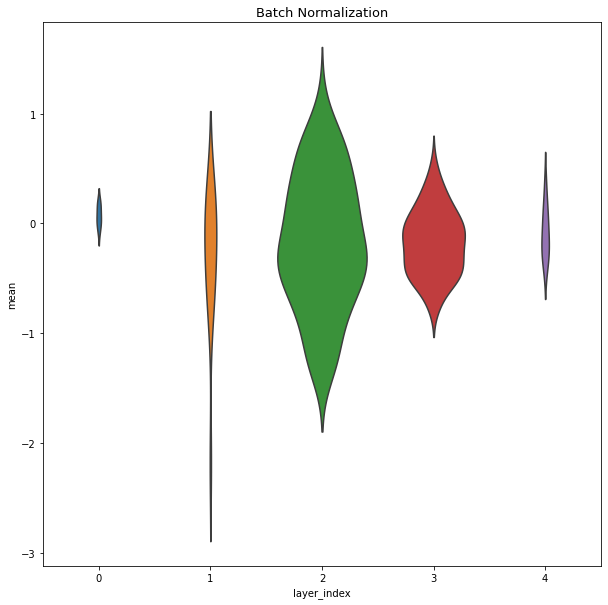

In [129]:
import numpy as np
import matplotlib.pyplot as plt

fontsize = 16  # fontsize

fig, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="layer_index", y='mean', data=df, ax=ax, scale='count', inner=None)

ax.set_xlabel('layer_index')
ax.set_ylabel('mean')

# ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)
ax.set_title("Batch Normalization, mean", fontsize=13)

for ax in axs.flat:
    ax.set_yticklabels([])

# fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

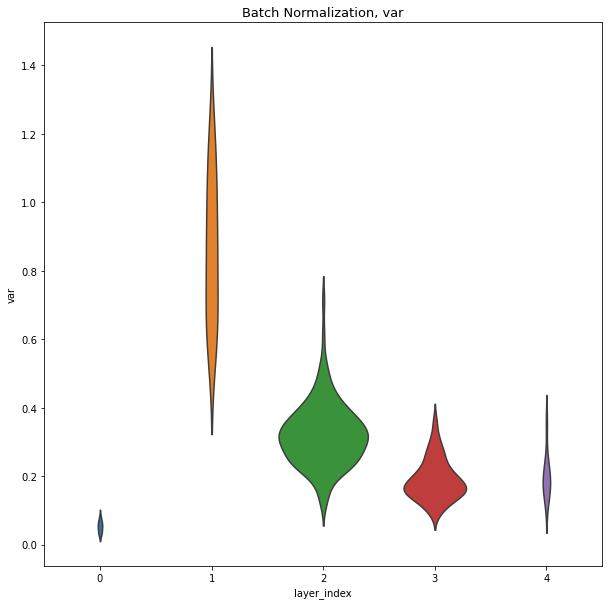

In [131]:
import numpy as np
import matplotlib.pyplot as plt

fontsize = 16  # fontsize

fig, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="layer_index", y='var', data=df, ax=ax, scale='count', inner=None)

ax.set_xlabel('layer_index')
ax.set_ylabel('var')

# ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)
ax.set_title("Batch Normalization, var", fontsize=13)

for ax in axs.flat:
    ax.set_yticklabels([])

# fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

## 4

In [164]:
train(input_norm=True, batch_norm=False, dropout=True, epoch=20)

epoch:0, accuracy: 0.7286
loss_test: 1.0514765977859497
epoch:1, accuracy: 0.8381
loss_test: 0.6110142469406128
epoch:2, accuracy: 0.8485
loss_test: 0.5335776805877686
epoch:3, accuracy: 0.8568
loss_test: 0.45602941513061523
epoch:4, accuracy: 0.8633
loss_test: 0.42601004242897034
epoch:5, accuracy: 0.8579
loss_test: 0.46742138266563416
epoch:6, accuracy: 0.8687
loss_test: 0.39647504687309265
epoch:7, accuracy: 0.8685
loss_test: 0.3968135714530945
epoch:8, accuracy: 0.8687
loss_test: 0.4017181396484375
epoch:9, accuracy: 0.8644
loss_test: 0.4213668704032898
epoch:10, accuracy: 0.872
loss_test: 0.37497082352638245
epoch:11, accuracy: 0.8724
loss_test: 0.3718711733818054
epoch:12, accuracy: 0.8727
loss_test: 0.36536088585853577
epoch:13, accuracy: 0.8736
loss_test: 0.3534061014652252
epoch:14, accuracy: 0.8733
loss_test: 0.3592739701271057
epoch:15, accuracy: 0.8707
loss_test: 0.3838425278663635
epoch:16, accuracy: 0.8726
loss_test: 0.38501083850860596
epoch:17, accuracy: 0.875
loss_test

Please refer to the summury section. Dropout need larger training epochs, and I set the training epochs to 20 which do not make the model converge. The performance is worse than batch normalization.

## 5

In [165]:
train(input_norm=True, batch_norm=True, dropout=True, epoch=20)

epoch:0, accuracy: 0.9604
loss_test: 0.6388016939163208
epoch:1, accuracy: 0.9772
loss_test: 0.468148797750473
epoch:2, accuracy: 0.9784
loss_test: 0.3947565257549286
epoch:3, accuracy: 0.9809
loss_test: 0.3498525023460388
epoch:4, accuracy: 0.9831
loss_test: 0.3125229775905609
epoch:5, accuracy: 0.9835
loss_test: 0.29976993799209595
epoch:6, accuracy: 0.9864
loss_test: 0.2741749882698059
epoch:7, accuracy: 0.9863
loss_test: 0.25674837827682495
epoch:8, accuracy: 0.9877
loss_test: 0.23890264332294464
epoch:9, accuracy: 0.9889
loss_test: 0.22620117664337158
epoch:10, accuracy: 0.9881
loss_test: 0.22208252549171448
epoch:11, accuracy: 0.9903
loss_test: 0.21678367257118225
epoch:12, accuracy: 0.9894
loss_test: 0.21128270030021667
epoch:13, accuracy: 0.9882
loss_test: 0.21249206364154816
epoch:14, accuracy: 0.9896
loss_test: 0.20029127597808838
epoch:15, accuracy: 0.9902
loss_test: 0.19203795492649078
epoch:16, accuracy: 0.9892
loss_test: 0.18509063124656677
epoch:17, accuracy: 0.9895
loss

### Summary

| method                                      |  acc   |  loss  | train_epochs |
| :------------------------------------------ | :----: | :----: | -----------: |
| input_norm(std_norm, default)  + batch_norm | 0.988  | 0.0446 |           10 |
| input_norm(batch_norm)  + batch_norm        | 0.9888 | 0.0424 |           10 |
| input_norm  + dropout                       | 0.8761 | 0.3488 |           20 |
| input_norm  + batch_norm + dropout          | 0.9892 | 0.1765 |           20 |

From the result above, the dropout with batch_norm can achieve the best performance comparing to other methods. If model the dropout only will be harder to converge and the performance is not as good as batch_norm.

# Problem 4 (Universal Approximators: Depth Vs. Width)

$f\left(x_{1}, x_{2}\right)=-\left(x_{2}+47\right) \sin \sqrt{\left|\frac{x_{1}}{2}+\left(x_{2}+47\right)\right|}-x_{1} \sin \sqrt{\left|x_{1}-\left(x_{2}+47\right)\right|}$

## 1

In [1]:
total = 100000
train_size = total * 0.8
test_size = total * 0.2

## Model Definition

In [2]:
import argparse
from email import parser
import numpy as np
import sys
import time

def f_function(x):
    x_1 = x[:,0]
    x_2 = x[:,1]
    return -(x_2+47)*np.sin(np.sqrt(np.abs(x_1/2+x_2+47))) - x_1*np.sin(np.sqrt(np.abs(x_1-x_2+47))) 

def y_function(x):
    n = len(x)
    return f_function(x) + np.random.normal(0, np.sqrt(0.3), size=(n))

def get_data(n):
    n = int(n)
    x_1 = np.random.uniform(low=-512, high=512, size=(n))
    x_2 = np.random.uniform(low=-512, high=512, size=(n))
    x = np.array([x_1,x_2]).T.astype(np.float32)
    print(x.shape)
    y = y_function(x).astype(np.float32)
    return x, y


import torch
import torch.nn as nn

def get_number_of_param(model):
    """get the number of param for every element"""
    count = 0
    for param in model.parameters():
        param_size = param.size()
        count_of_one_param = 1
        for dis in param_size:
            count_of_one_param *= dis
        print(param.size(), count_of_one_param)
        count += count_of_one_param
        print(count)
    print('total number of the model is %d'%count)


class MLPDataset(torch.utils.data.Dataset):
    def __init__(self, n):
        self.x, self.y = get_data(n)
        print(self.x.shape, self.y.shape)
        self.x = torch.from_numpy(self.x)
        self.y = torch.from_numpy(self.y)
        self.x = self.x / 512
        print(self.x, self.y.shape)
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return len(self.x)

class MLP(nn.Module):
    def __init__(self, layer_sizes):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes)):
            size = layer_sizes[i]
            self.layers.append(nn.Linear(size[0], size[1]))
            if i < len(layer_sizes)-1:
                self.layers.append(nn.BatchNorm1d(size[1]))
                self.layers.append(nn.ReLU())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


class RMSError(nn.Module):
    def __init__(self):
        super(RMSError, self).__init__()
    def forward(self, output, target):
        return torch.sqrt(torch.mean((output-target)**2))

def train_mlp(model):
    total = 100000
    train_size = total * 0.8
    test_size = total * 0.2
    train_dataset = MLPDataset(train_size)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
    test_dataset = MLPDataset(test_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)
    measure = RMSError()
    # loss_func = nn.RMSError()

    optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
    # scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts
    
    train_epoch = 2000
    for epoch in range(train_epoch):
        model.train()
        total_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.cuda()
            target = target.cuda()
            # print()
            optimizer.zero_grad()
            output = model(data).squeeze()
            # print(output, target)
            loss = measure(output, target)
            loss.backward()
            total_loss += loss.item()
            optimizer.step()
        total_loss = total_loss/(batch_idx+1)
        print('Epoch: %d, Loss: %f' % (epoch, total_loss), end=' ')
        test_mlp(model, test_loader, measure)
        sys.stdout.flush()

def test_mlp(model, test_loader, measure):
    model.eval()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        data = data.cuda()
        target = target.cuda()
        output = model(data).squeeze()
        loss = measure(output, target)
        total_loss += loss.item()
    total_loss = total_loss/(batch_idx+1)
    print('Test: Loss: %f' % (total_loss))


def test_data():
    x, y = get_data(1)

    # assert f_function(x) == y
    print(x, y)

def main(number_layers, config_number):

    # two groups
    two_group_list = []
    
    layer_sizes = [[2,32],[32,1]] # 32
    two_group_list.append(layer_sizes)
    layer_sizes = [[2,64],[64,1]] # 64
    two_group_list.append(layer_sizes)
    layer_sizes = [[2,128],[128,1]] # 128
    two_group_list.append(layer_sizes)
    layer_sizes = [[2,256],[256,1]] # 256
    two_group_list.append(layer_sizes)
    layer_sizes = [[2,512],[512,1]] # 512
    two_group_list.append(layer_sizes)
    
    # three groups
    three_groups_list = []
    layer_sizes = [[2,32],[32,32],[32,1]] # 64
    three_groups_list.append(layer_sizes)
    layer_sizes = [[2,64],[64,64],[64,1]] # 128
    three_groups_list.append(layer_sizes)
    layer_sizes = [[2,128],[128,128],[128,1]] # 256
    three_groups_list.append(layer_sizes)
    layer_sizes = [[2,256],[256,256],[256,1]] # 512
    three_groups_list.append(layer_sizes)

    # four groups
    layer_sizes = [[2,32],[32,64],[64,32],[32,1]]       # 128
    four_groups_list = [layer_sizes]
    layer_sizes = [[2,64],[64,128],[128,64],[64,1]]     # 256
    four_groups_list.append(layer_sizes)
    layer_sizes = [[2,128],[128,256],[256,128],[128,1]] # 512
    four_groups_list.append(layer_sizes)


    if number_layers == 2:
        layer_sizes = two_group_list[config_number]
    elif number_layers == 3:
        layer_sizes = three_groups_list[config_number]
    elif number_layers == 4:
        layer_sizes = four_groups_list[config_number]

    # calculate the wall time
    f = open(f"./outputs/{number_layers}_layers_config_{config_number}.txt", "w")
    sys.stdout = f
    start_time = time.time()
    mlp = MLP(layer_sizes).cuda()
    print(get_number_of_param(mlp))
    # print(mlp)
    train_mlp(mlp)
    end_time = time.time()
    print('Wall time: %f' % (end_time - start_time))
    

# if __name__ == '__main__':
#     argparser = argparse.ArgumentParser()
#     argparser.add_argument('--number_layers', type=int, default=2)
#     argparser.add_argument('--config_number', type=int, default=2)
#     args = argparser.parse_args()
#     main(args.number_layers, args.config_number)


The runnning time is too long, we use python file but not the jupyter, I paste the code above.

For reimplementatino, please use main(number_layers, config_number).

## Summary

I kept the outputs in outputs directory.

| layer_configuration                   | hiddent_layers | parameter_count | budget | train_loss | test_loss | wall_time |
| :------------------------------------ | -------------- | :-------------: | :----: | :--------: | :-------: | :-------: |
| [[2,32],[32,1]]                       | 1              |       193       |   32   |  267.7139  | 259.7245  | 1259.5395 |
| [[2,64],[64,1]]                       | 1              |       385       |   64   |  277.1494  | 274.5094  | 1260.0662 |
| [[2,128],[128,1]]                     | 1              |       769       |  128   |  267.8294  | 274.4509  | 1257.8628 |
| [[2,256],[256,1]]                     | 1              |      1537       |  256   |  255.0403  | 244.4364  | 1255.8768 |
| [[2,512],[512,1]]                     | 1              |      3073       |  512   |  229.6892  | 217.06584 | 1273.1020 |
| [[2,32],[32,32],[32,1]]               | 2              |      1313       |   64   |  239.0541  | 234.8284  | 1212.5115 |
| [[2,64],[64,64],[64,1]]               | 2              |      4673       |  128   |  135.9276  |  99.5079  | 1212.4536 |
| [[2,128],[128,128],[128,1]]           | 2              |      17537      |  256   |  132.8704  | 103.7459  | 1221.9966 |
| [[2,256],[256,256],[256,1]]           | 2              |      67841      |  512   |  123.4739  |  97.7581  | 1220.2962 |
| [[2,32],[32,64],[64,32],[32,1]]       | 3              |      4577       |  128   |  114.766   |  80.8045  | 1130.7788 |
| [[2,64],[64,128],[128,64],[64,1]]     | 3              |      17345      |  256   |  89.7599   |  65.3549  | 1145.7208 |
| [[2,128],[128,256],[256,128],[128,1]] | 3              |      67457      |  512   |  80.8764   |  58.7546  | 1137.7851 |

## plot the results

In [4]:
hiddent_layers = [1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3]
parameter_count = [193,385,769,1537,3073,1313,4673,17537,67841,4577,17345,67457]
budget = [32,64,128,256,512,64,128,256,512,128,256,512]
train_loss = [267.7139,277.1494,267.8294,255.0403,229.6892,239.0541,135.9276,132.8704,123.4739,114.766,89.7599,80.8764]
test_loss = [259.7245,274.5094,274.4509,244.4364,217.06584,234.8284,99.5079,103.7459,97.7581,80.8045,65.3549,58.7546]
wall_time = [1259.5395,1260.0662,1257.8628,1255.8768,1273.1020,1212.5115,1212.4536,1221.9966,1220.2962,1130.7788,1145.7208,1137.7851]

In [21]:
from collections import Counter, defaultdict
budget_dict = dict(Counter(budget))
print(budget_dict)
d = defaultdict(int)
for b in range(len(budget)):
    # print(b)
    d[budget[b]] += test_loss[b]
for k,v in d.items():
    # print(k,v)
    d[k] = v/budget_dict[k]

{32: 1, 64: 2, 128: 3, 256: 3, 512: 3}


In [22]:
d

defaultdict(int,
            {32: 259.7245,
             64: 254.6689,
             128: 151.58776666666668,
             256: 137.84573333333333,
             512: 124.52618})

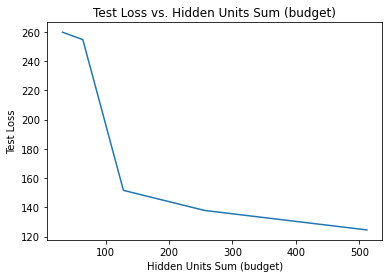

In [25]:
# plot d
import matplotlib.pyplot as plt
import numpy as np
x = d.keys()
y = d.values()
plt.plot(x,y)
plt.xlabel('Hidden Units Sum (budget)')
plt.ylabel('Test Loss')
plt.title('Test Loss vs. Hidden Units Sum (budget)')
plt.show()

More hiddent units count, better test loss.

In [37]:
plot_data = list(zip(parameter_count, test_loss))
plot_data.sort(key=lambda x: x[0])

In [38]:
plot_data

[(193, 259.7245),
 (385, 274.5094),
 (769, 274.4509),
 (1313, 234.8284),
 (1537, 244.4364),
 (3073, 217.06584),
 (4577, 80.8045),
 (4673, 99.5079),
 (17345, 65.3549),
 (17537, 103.7459),
 (67457, 58.7546),
 (67841, 97.7581)]

Text(0.5, 1.0, 'Test Loss vs. Parameter Count')

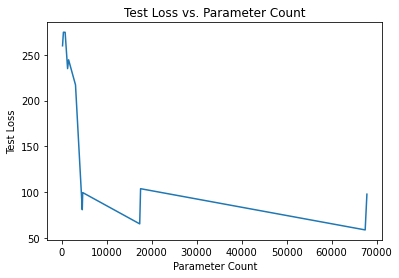

In [39]:
# plot parameter_count
import matplotlib.pyplot as plt
import numpy as np
x = [i[0] for i in plot_data]
y = [i[1] for i in plot_data]
plt.plot(x,y)
plt.xlabel('Parameter Count')
plt.ylabel('Test Loss')
plt.title('Test Loss vs. Parameter Count')

The Curve is not that smooth, but we can observe the trend. More parameter_count, better test loss.

## 2
Comment on the tradeoff between number of parameters and RMSE as you go from deeper (3 hidden layers) to shallow networks (1 hidden layer). Also measure the wall clock time for training each configuration and plot training time vs number of parameters. Do you see a similar tradeoff in training time ?

For deeper network, it seems can achieve better than shallow but wider network. Such obervation match the current trend that make the network deeper and deeper. For the same depth network, wider network can achieve better test loss.

In [42]:
plot_data = list(zip(parameter_count,wall_time))
plot_data.sort(key=lambda x: x[0])

Text(0.5, 1.0, 'Wall Time vs. Parameter Count')

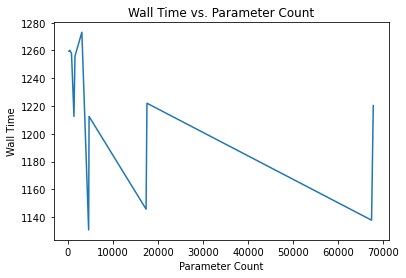

In [43]:
# plot 
import matplotlib.pyplot as plt
import numpy as np
x = [i[0] for i in plot_data]
y = [i[1] for i in plot_data]
plt.plot(x,y)
plt.xlabel('Parameter Count')
plt.ylabel('Wall Time')
plt.title('Wall Time vs. Parameter Count')


There is no clear trend for the training time tradeoff, one of the reason is that the dataloading time maybe the bottleneck and the network is too simple (no need bp for long time). Actually, we should expect the training time longer for the model with more parameters.

# Problem 5 (Learning Rate, Batch Size, FashionMNIST)

Recall cyclical learning rate policy discussed in Lecture 4. The learning rate changes in cyclical manner between lr min and lr max , which are hyperparameters that need to be specified. For this problem you first need to read carefully the article referenced below as you will be making use of the code there (in Keras) and modifying it as needed. For those who want to work in Pytorch there are open source implementations of this policy available which you can easily search for and build over them. You will work with FashionMNIST dataset and MiniGoogLeNet (described in reference).

## 1
Fix batch size to 64 and start with 10 candidate learning rates between 10 −9and 10 1and train your model for 5 epochs. Plot the training loss as a function of learning rate. You should see a curve like Figure 3 in reference below. From that figure identify the values of lr min and lr max . (2)


### Model Definition

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class InceptionModule(nn.Module):
    """
    Class to apply inception by merging a conv1x1 and conv3x3
    """

    def __init__(self, in_channels, opK1x1, opK3x3):
        super(InceptionModule, self).__init__()

        ## Defining 1x1 & 3x3 convolution
        self.conv0 = BasicConv2d(in_channels, opK1x1, kernel_size=1)
        self.conv1 = BasicConv2d(in_channels, opK3x3, kernel_size=3, padding=1)

    def forward(self, x):
        # Applying 1x1 & 3x3 convolution
        conv_1x1 = self.conv0(x)
        conv_3x3 = self.conv1(x)

        # Concatenating output
        outputs = [conv_1x1, conv_3x3]

        return torch.cat(outputs, 1)


class DownsampleModule(nn.Module):
    """
    Class to apply downsampling by merging a conv and max pooling layer
    """

    def __init__(self, in_channels, k):
        super(DownsampleModule, self).__init__()

        # Defining convolution layer
        self.conv0 = BasicConv2d(in_channels, k, kernel_size=3, stride=2)

    def forward(self, x):

        # Convolution layer
        conv_3x3 = self.conv0(x)

        # Pooling layer
        pool = F.max_pool2d(x, kernel_size=3, stride=2)

        # Concatenation
        outputs = [conv_3x3, pool]

        return torch.cat(outputs, 1)


class BasicConv2d(nn.Module):
    """
    Class to apply basic Conv => BN => RELU sequence
    """

    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()

        # Define a CONV => BN => RELU
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        # Applying a CONV => BN => RELU
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

In [45]:
# MiniGoogLeNet
class MiniGoogLeNet(nn.Module):
    """
    A small and light weight model inspired by Inception architecture
    """

    def __init__(self, n_class, size, depth):
        super().__init__()
        self.n_class = n_class
        self.size = size
        self.depth = depth
        self.conv0 = BasicConv2d(
            in_channels=depth, out_channels=96, kernel_size=3, stride=1, padding=1
        )

        # Inceptionx2 => Downsample
        self.inception1a = InceptionModule(in_channels=96, opK1x1=32, opK3x3=32)
        self.inception1b = InceptionModule(in_channels=64, opK1x1=32, opK3x3=48)
        self.downsample1a = DownsampleModule(in_channels=80, k=80)

        # Inceptionx4 => Downsample
        self.inception2a = InceptionModule(in_channels=160, opK1x1=112, opK3x3=48)
        self.inception2b = InceptionModule(in_channels=160, opK1x1=96, opK3x3=64)
        self.inception2c = InceptionModule(in_channels=160, opK1x1=80, opK3x3=80)
        self.inception2d = InceptionModule(in_channels=160, opK1x1=48, opK3x3=96)
        self.downsample2a = DownsampleModule(in_channels=144, k=96)

        # Inceptionx2 => Average Pool
        self.inception3a = InceptionModule(in_channels=240, opK1x1=176, opK3x3=160)
        self.inception3b = InceptionModule(in_channels=336, opK1x1=176, opK3x3=160)

        # Final FC layer
        self.fc4a = nn.Linear(in_features=336, out_features=n_class)

    def forward(self, x):
        # If x is 3 x 28 x 28
        x = self.conv0(x)  # 96 x 28 x 28

        # Inceptionx2 => Downsample
        x = self.inception1a(x)  # 64 x 28 x 28
        x = self.inception1b(x)  # 80 x 28 x 28
        x = self.downsample1a(x)  # 160 x 13 x 13

        # Inceptionx4 => Downsample
        x = self.inception2a(x)  # 160 x 13 x 13
        x = self.inception2b(x)  # 160 x 13 x 13
        x = self.inception2c(x)  # 160 x 13 x 13
        x = self.inception2d(x)  # 144 x 13 x 13
        x = self.downsample2a(x)  # 240 x 6 x 6

        # Inceptionx2 => Average Pool 
        x = self.inception3a(x)  # 336 x 6 x 6
        x = self.inception3b(x).squeeze()  # 336 x 6 x 6
        
        x = F.avg_pool2d(x, kernel_size=6)  # 366 x 1 x 1

        # Dropout => Flatten => Dense(Fully-Connected)
        x = F.dropout(x, p=0.5)  # 366 x 1 x 1
        x = x.view(x.size(0), -1).squeeze()  # 366
        x = self.fc4a(x) # 10

        return x


In [46]:
model = MiniGoogLeNet(n_class=10, size=28, depth=1)
# print(train_dataset[0][0].shape)
dummy_input = torch.randn(1, 1, 28, 28)
model(dummy_input)

tensor([ 0.4090,  0.0526, -0.0889, -0.0257,  0.6539, -0.0134, -0.3790,  0.2335,
        -0.1663,  0.0261], grad_fn=<AddBackward0>)

### Dataset Definition

In [47]:
# Fasion-MNIST
import torchvision
from torchvision import transforms

train_transform = transforms.Compose([transforms.ToTensor()])
test_transform = transforms.Compose([transforms.ToTensor()])

batch_size = 64

train_dataset = torchvision.datasets.FashionMNIST(root="./cached_datasets", train=True, transform=train_transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./cached_datasets", train=False, transform=test_transform, download=True)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [48]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

### LR Variation

In [49]:
lr_min = 10e-9
lr_max = 10e1

accuracy_list = []
train_loss_list = []
lr_list = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
max_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for lr in lr_list:
    model = MiniGoogLeNet(n_class=10, size=28, depth=1).to(device)
    optimizers = torch.optim.Adam(model.parameters(), lr=lr)
    final_loss = 0
    for epoch in range(max_epochs):
        print(lr, epoch)
        for i, (images, labels) in enumerate(train_dataloader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)

            # Backward and optimize
            optimizers.zero_grad()
            loss.backward()
            optimizers.step()

            if epoch == max_epochs-1:
                final_loss += loss.item()
    final_loss /= len(train_dataloader)
    train_loss_list.append(final_loss)

1e-08 0
1e-08 1
1e-08 2
1e-08 3
1e-08 4
1e-07 0
1e-07 1
1e-07 2
1e-07 3
1e-07 4
1e-06 0
1e-06 1
1e-06 2
1e-06 3
1e-06 4
1e-05 0
1e-05 1
1e-05 2
1e-05 3
1e-05 4
0.0001 0
0.0001 1
0.0001 2
0.0001 3
0.0001 4
0.001 0
0.001 1
0.001 2
0.001 3
0.001 4
0.01 0
0.01 1
0.01 2
0.01 3
0.01 4
0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
1.0 0
1.0 1
1.0 2
1.0 3
1.0 4
10.0 0
10.0 1
10.0 2
10.0 3
10.0 4


In [50]:
train_loss_list

[2.3331496677419015,
 2.0706307956658954,
 0.8813814934509904,
 0.3275380183511706,
 0.1585060086156895,
 0.1701240998162612,
 0.21169623874747423,
 0.37025286997559226,
 2.3776847512991446,
 2.8857513994042043]

In [51]:
lr_list

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

### plot

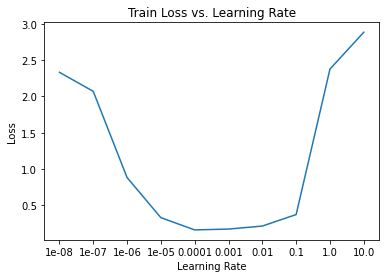

In [52]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(train_loss_list)
plt.xlabel('Learning Rate')
plt.xticks(range(len(lr_list)), lr_list)
plt.ylabel('Loss')
plt.title('Train Loss vs. Learning Rate')
plt.show()

We choose lr_base = 1e-08 and lr_max = 1e-04.

In [6]:
lr_min = 1e-8
lr_max = 1e-4

## 2
Use the cyclical learning rate policy (with exponential decay) and train your network using batch size 64 and lr min and lr max values obtained in part 1. Plot train/validation loss and accuracy curve (similar to Figure 4 in reference). (3)

In [8]:
print(len(train_dataset))
ori_train_dataset = train_dataset
lr_min = 1e-8
lr_max = 1e-4

60000


### Training Function Definition

In [9]:
from torchmetrics import Accuracy
import torch
# lr_min = 10e-9
# lr_max = 10e1

train_dataset, val_dataset = torch.utils.data.random_split(ori_train_dataset, [50000, 10000])
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


acc_metric = Accuracy().to(device)

def train(epoch, model, train_dataloader, optimizer, scheduler, accumulation_steps=1):
    model.train()
    train_acc = 0
    train_loss = 0
    train_loss_step_list = []
    train_acc_step_list = []
    count = 0
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        
        if count == accumulation_steps:
            optimizer.step()
            if scheduler is not None:
                scheduler.step()
            optimizer.zero_grad()
            count = 0

        train_loss_step_list.append(loss.item())
        train_acc_step_list.append(acc_metric(torch.argmax(outputs, dim=1).to(device), labels).item())

        train_loss += loss.item()
        train_acc += torch.sum(torch.argmax(outputs, dim=1) == labels).item()
        count += 1
    train_acc /= len(train_dataset)
    train_loss /= len(train_dataloader)
    return train_acc, train_loss, train_acc_step_list, train_loss_step_list

def val(epoch, model, val_dataloader):
    model.eval()
    val_acc = 0
    val_loss = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_dataloader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            val_acc += torch.sum(torch.argmax(outputs, dim=1) == labels).item()
        val_loss /= len(val_dataloader)
        val_acc /= len(val_dataset)
    return val_acc, val_loss

def train_model(model, optimizer, scheduler, max_epochs, batch_size):
    if batch_size in [32, 64, 128, 256, 512, 1024, 2048, 4096]:
        train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        accumulation_steps = 1
    else:
        accumulation_steps = batch_size // 2048
        real_batch_size = 2048
        train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=real_batch_size, shuffle=True)
        val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=real_batch_size, shuffle=False)
        print(f"real_batch_size:{real_batch_size}", f"accumulation_steps:{accumulation_steps}")
    train_loss_list = []
    val_loss_list = []

    train_acc_list = []
    val_acc_list = []

    train_loss_step_list = []
    # val_loss_step_list = []
    train_acc_step_list = []
    # val_acc_step_list = []
    for epoch in range(max_epochs):
        print(f'Epoch: {epoch+1}/{max_epochs}',f"batch_size: {batch_size}")
        train_acc, train_loss, cur_train_acc_step_list, cur_train_loss_step_list = train(epoch, model, train_dataloader, optimizer, scheduler, accumulation_steps)
        train_acc_step_list.extend(cur_train_acc_step_list)
        train_loss_step_list.extend(cur_train_loss_step_list)
        val_acc, val_loss = val(epoch, model, val_dataloader)
        
        train_acc_list.append(train_acc)
        train_loss_list.append(train_loss)
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)
    return train_acc_list, train_loss_list, val_acc_list, val_loss_list, train_acc_step_list, train_loss_step_list

In [11]:
model = MiniGoogLeNet(n_class=10, size=28, depth=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr_min)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=lr_min, max_lr=lr_max, cycle_momentum=False)
train_acc_list, train_loss_list, val_acc_list, val_loss_list, train_acc_step_list, train_loss_step_list = train_model(model, optimizer, scheduler, max_epochs=5, batch_size=64)

Epoch: 1/5 batch_size: 64
Epoch: 2/5 batch_size: 64
Epoch: 3/5 batch_size: 64
Epoch: 4/5 batch_size: 64
Epoch: 5/5 batch_size: 64


### Plot Epoch-wise

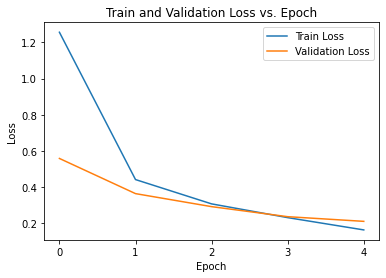

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.xticks(range(len(train_loss_list)), range(len(train_loss_list)))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss vs. Epoch')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

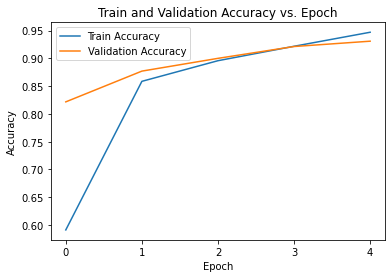

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.xticks(range(len(train_acc_list)), range(len(train_acc_list)))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

### Plot Step-wise

In [14]:
import matplotlib
len(train_loss_step_list)

3910

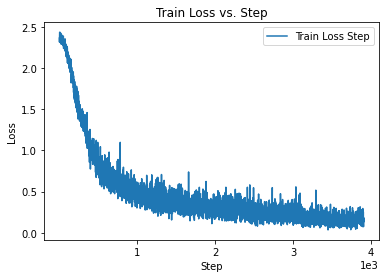

In [15]:
plt.plot(train_loss_step_list)
plt.xticks([1000,2000,3000,4000])
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Train Loss vs. Step')
plt.legend(['Train Loss Step'])
plt.show()

## 3
We want to test if increasing batch size for a fixed learning rate has the same effect as decreasing learning rate for a fixed batch size. Fix learning rate to lr max and train your network starting with batch size 32 and incrementally going upto 16384 (in increments of a factor of 2; like 32, 64...). You can choose a step size (in terms of number of iterations) to increment the batch size. If your GPU cannot handle large batch sizes, you need to employ effective batch size approach as discussed in Lecture 3 to simulate large batches. Plot the training loss. Is the generalization of your final model similar or different than cyclical learning rate policy?

We applied the effective batch size approach to batchsize > 4096.

In [16]:
train_dataset, val_dataset = torch.utils.data.random_split(ori_train_dataset, [50000, 10000])


train_loss_list = []
val_loss_list = []

train_acc_list = []
val_acc_list = []

train_loss_step_list = []
val_loss_step_list = []
train_acc_step_list = []
val_acc_step_list = []

acc_metric = Accuracy().to(device)


batch_size_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
# batch_size_list = [16384]

train_acc_list_list = []
val_acc_list_list = []
train_loss_list_list = []
val_loss_list_list = []
train_acc_step_list_list = []
val_acc_step_list_list = []

for batch_size in batch_size_list:
    # redefine model
    model = MiniGoogLeNet(n_class=10, size=28, depth=1).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_max)
    scheduler = None

    train_acc_list, train_loss_list, val_acc_list, val_loss_list, train_acc_step_list, train_loss_step_list = train_model(model, optimizer, scheduler, max_epochs=5, batch_size=batch_size)
    train_acc_list_list.append(train_acc_list)
    val_acc_list_list.append(val_acc_list)
    train_loss_list_list.append(train_loss_list)
    val_loss_list_list.append(val_loss_list)
    train_acc_step_list_list.append(train_acc_step_list)
    val_acc_step_list_list.append(val_acc_step_list)

Epoch: 1/5 batch_size: 32
Epoch: 2/5 batch_size: 32
Epoch: 3/5 batch_size: 32
Epoch: 4/5 batch_size: 32
Epoch: 5/5 batch_size: 32
Epoch: 1/5 batch_size: 64
Epoch: 2/5 batch_size: 64
Epoch: 3/5 batch_size: 64
Epoch: 4/5 batch_size: 64
Epoch: 5/5 batch_size: 64
Epoch: 1/5 batch_size: 128
Epoch: 2/5 batch_size: 128
Epoch: 3/5 batch_size: 128
Epoch: 4/5 batch_size: 128
Epoch: 5/5 batch_size: 128
Epoch: 1/5 batch_size: 256
Epoch: 2/5 batch_size: 256
Epoch: 3/5 batch_size: 256
Epoch: 4/5 batch_size: 256
Epoch: 5/5 batch_size: 256
Epoch: 1/5 batch_size: 512
Epoch: 2/5 batch_size: 512
Epoch: 3/5 batch_size: 512
Epoch: 4/5 batch_size: 512
Epoch: 5/5 batch_size: 512
Epoch: 1/5 batch_size: 1024
Epoch: 2/5 batch_size: 1024
Epoch: 3/5 batch_size: 1024
Epoch: 4/5 batch_size: 1024
Epoch: 5/5 batch_size: 1024
Epoch: 1/5 batch_size: 2048
Epoch: 2/5 batch_size: 2048
Epoch: 3/5 batch_size: 2048
Epoch: 4/5 batch_size: 2048
Epoch: 5/5 batch_size: 2048
Epoch: 1/5 batch_size: 4096
Epoch: 2/5 batch_size: 4096

## Plot

### Epoch-wise Accuracy

In [21]:
train_acc_list_list

array([[0.83466, 0.90222, 0.92074, 0.93382, 0.94216],
       [0.81808, 0.89788, 0.9167 , 0.93018, 0.94042],
       [0.80824, 0.89894, 0.91786, 0.93078, 0.94362],
       [0.77348, 0.88642, 0.90954, 0.92322, 0.93802],
       [0.71182, 0.86602, 0.8959 , 0.9142 , 0.92568],
       [0.63018, 0.82378, 0.87372, 0.8961 , 0.91018],
       [0.537  , 0.76316, 0.81316, 0.85206, 0.87822],
       [0.39692, 0.67488, 0.74898, 0.78472, 0.8112 ],
       [0.28448, 0.54464, 0.6568 , 0.72064, 0.75196],
       [0.18264, 0.41104, 0.51242, 0.57356, 0.63086]])

In [31]:
import numpy as np
val_acc_list_list = np.array(val_acc_list_list).T

In [32]:
val_acc_list_list

array([[0.8886, 0.8848, 0.8625, 0.8542, 0.8205, 0.7642, 0.1582, 0.1029,
        0.1046, 0.1056],
       [0.9188, 0.9087, 0.8852, 0.8836, 0.8694, 0.8399, 0.727 , 0.1031,
        0.5728, 0.4626],
       [0.9265, 0.9233, 0.9057, 0.8906, 0.8857, 0.8716, 0.8294, 0.4852,
        0.6963, 0.5312],
       [0.9312, 0.9181, 0.9131, 0.8999, 0.8555, 0.8928, 0.8544, 0.7587,
        0.7395, 0.5995],
       [0.9284, 0.9249, 0.8969, 0.8929, 0.8825, 0.8939, 0.8765, 0.8042,
        0.7649, 0.6607]])

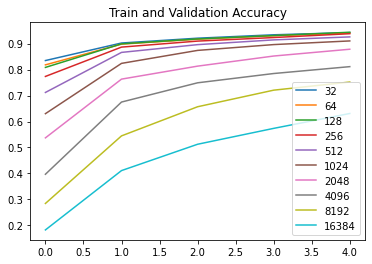

In [41]:
import matplotlib.pyplot as plt

plt.plot(train_acc_list_list)
plt.title('Train Accuracy')
plt.legend(batch_size_list)

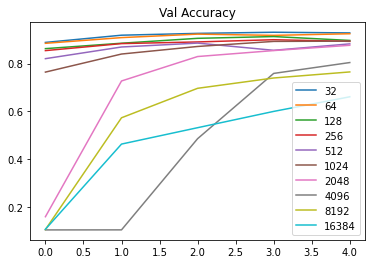

In [42]:
plt.plot(val_acc_list_list)
plt.title('Val Accuracy')
plt.legend(batch_size_list)

Is the generalization of your final model similar or different than cyclical learning rate policy?

We can see that for large batch size, we may need more iterations to get the same accuracy. The generalization of the model of small batch size is similar to cyclical learning rate policy model. But for large batch size model, the performance needs more iterations to get the same accuracy.